# Quantum Circuits


Notes


In [ ]:
from qiskit import __version__
print(__version__)

2.0.0


In [3]:
# Importing necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

We've seen some of these imports in the two previous lessons, but others are new. For now, let's just highlight that we will be using the Aer simulator to simulate quantum circuits.

To begin, we can build the circuit above as follows, by defining a quantum circuit with one qubit and sequentially adding gates from left to right.

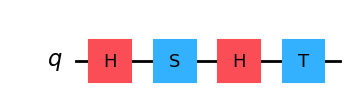

In [4]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

The default names for qubits in Qiskit are q0, q1, q2​, etc., and when there's just a single qubit, like in our example, the default name is 
q rather than q0. If we wish to choose our own name we can do this using the `QuantumRegister` class, which allows us to name a collection of qubits as treat it as a single object. Here we're doing this with just a single qubit.

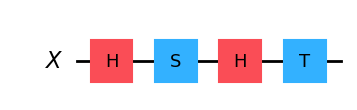

In [5]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output="mpl"))

Here's another example of a quantum circuit, this time with two qubits:



Quantum circuit that creates an ebit

As always, the gate labeled H refers to a Hadamard operation, while the second gate is a controlled-NOT operation: the solid circle represents the control qubit and the circle resembling the symbol ⊕ denotes the target qubit.

Before examining this circuit in greater detail and explaining what it does, it is imperative that we first clarify how qubits are ordered in quantum circuits. This connects with the convention that Qiskit uses for naming and ordering systems that was mentioned briefly in the previous lesson.

# Qiskit's Qubit Ordering Convention for Circuits

In Qiskit, the **topmost** qubit in a circuit diagram has index `0` and corresponds to the **rightmost** position in a tuple of qubits (or in a string, Cartesian product, or tensor product corresponding to this tuple). The **second-from-top** qubit has index `1`, and corresponds to the position **second-from-right** in a tuple, and so on, down to the **bottommost** qubit, which has the highest index, and corresponds to the **leftmost** position in a tuple.

In particular, Qiskit's default names for the qubits in an *n*-qubit circuit are represented by the *n*-tuple `(q_{n-1}, ..., q_0)`, with `q_0` being the qubit on the top and `q_{n−1}` on the bottom in quantum circuit diagrams.

---

Please be aware that this is a reversal of a more common convention for ordering qubits in circuits, and is a frequent source of confusion. Further information on this ordering convention can be found on the [Bit-ordering in Qiskit](https://docs.quantum.ibm.com/guides/bit-ordering) documentation page.

Although we sometimes deviate from the specific default names `q_0, ..., q_{n-1}` used for qubits by Qiskit, we will always follow the ordering convention described above when interpreting circuit diagrams throughout this course. Thus, our interpretation of the circuit above is that it describes an operation on a pair of qubits `(X, Y)`. If the input to the circuit is a quantum state `|ψ⟩ ⊗ |ϕ⟩`, for instance, then this means that the lower qubit `X` starts in the state `|ψ⟩` and the upper qubit `Y` starts in the state `|ϕ⟩`.

---

To understand what the circuit does, we can go from left to right through its operations.

1. The first operation is a Hadamard operation on Y:
